# Tiempo promedio mejorado entre despachos


In [7]:
import pandas as pd  # Para manipulación y análisis de datos
import numpy as np  # Para cálculos numéricos y manejo de arrays
import matplotlib.pyplot as plt  # Para visualización de datos

## Se realiza la carga del archivo con los datos filtrados

In [8]:
# Cargar el conjunto de datos desde un archivo CSV
# Asegúrate de reemplazar 'ruta_al_archivo.csv' con la ruta real de tu archivo
ruta_archivo = 'datos_pasajeros_filtrado.csv'
df = pd.read_csv(ruta_archivo)

# Mostrar las primeras filas del DataFrame para verificar la carga
df.head()

,FECHA_INICIAL,HORA_INICIAL_PLAN,HORA_INICIAL_REAL,HORA_INICIAL_AUX,FECHA_FINAL,HORA_FINAL_PLAN,HORA_FINAL_REAL,HORA_FINAL_AUX,FK_RUTA,PASAJEROS,DISTANCIA,FK_VEHICULO,FK_CONDUCTOR,ESTADO_DESPACHO,PK_INTERVALO_DESPACHO,PK_INFORMACION_REGISTRADORA,DIA_SEMANA
0,2024-04-22,4:02:00,NaN,0:00:00,2024-04-22,6:02:00,5:41:15,5:41:15,5,38,35000,51,38,2,245816,348363,Monday
1,2024-04-22,4:27:00,NaN,0:00:00,2024-04-22,7:26:00,6:39:44,6:05:01,3,49,36000,56,255,2,245818,348365,Monday
2,2024-04-22,4:12:00,NaN,0:00:00,2024-04-22,7:11:00,6:26:05,6:26:05,3,53,43600,22,321,2,245817,348366,Monday
3,2024-04-22,4:50:00,4:45:37,4:56:42,2024-04-22,7:01:00,6:30:07,6:30:07,6,30,31500,66,304,2,245820,348367,Monday
4,2024-04-22,4:33:00,NaN,0:00:00,2024-04-22,7:32:00,6:46:17,6:46:17,3,35,41400,37,26,2,245819,348369,Monday


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54645 entries, 0 to 54644
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   FECHA_INICIAL                54645 non-null  object
 1   HORA_INICIAL_PLAN            54645 non-null  object
 2   HORA_INICIAL_REAL            53975 non-null  object
 3   HORA_INICIAL_AUX             54645 non-null  object
 4   FECHA_FINAL                  54645 non-null  object
 5   HORA_FINAL_PLAN              54645 non-null  object
 6   HORA_FINAL_REAL              48690 non-null  object
 7   HORA_FINAL_AUX               54645 non-null  object
 8   FK_RUTA                      54645 non-null  int64 
 9   PASAJEROS                    54645 non-null  int64 
 10  DISTANCIA                    54645 non-null  int64 
 11  FK_VEHICULO                  54645 non-null  int64 
 12  FK_CONDUCTOR                 54645 non-null  int64 
 13  ESTADO_DESPACHO              54

In [10]:
# Filtrar los registros donde 'HORA_INICIAL_REAL' sea nulo o vacío
valores_nulos = df[df['HORA_INICIAL_REAL'].isnull()]

# Mostrar los registros con valores nulos en 'HORA_INICIAL_REAL'
print(valores_nulos)

# Mostrar el número total de valores nulos en 'HORA_INICIAL_REAL'
print(f"Total de valores nulos en 'HORA_INICIAL_REAL': {valores_nulos.shape[0]}")

      FECHA_INICIAL HORA_INICIAL_PLAN HORA_INICIAL_REAL HORA_INICIAL_AUX  \
0        2024-04-22           4:02:00               NaN          0:00:00   
1        2024-04-22           4:27:00               NaN          0:00:00   
2        2024-04-22           4:12:00               NaN          0:00:00   
4        2024-04-22           4:33:00               NaN          0:00:00   
8        2024-04-22           4:40:00               NaN          0:00:00   
...             ...               ...               ...              ...   
53970    2024-12-08           5:40:00               NaN          0:00:00   
54387    2025-02-16           4:30:00               NaN          0:00:00   
54476    2025-03-02           9:20:00               NaN          9:16:38   
54489    2025-03-02          11:55:00               NaN         11:54:54   
54496    2025-03-02           9:20:00               NaN         14:18:18   

      FECHA_FINAL HORA_FINAL_PLAN HORA_FINAL_REAL HORA_FINAL_AUX  FK_RUTA  \
0      202

## Por regla del negocio los vehiculos cque han sido planificados para despacho a muy tempranas horas de la mañana no salen del punto de origen, esto ocaciona que en la base de datos existan registros nulos o vacios en el campo HORA_INICIAL_REAL. Pero efectivamente los vehiculos estan prestando el servicio.
Por lo tanto aquellos datos nulos o vacios en este campo se reemplazan por los registros en el campo HORA_INICIAL_PLAN
A continuación se realiza el procedimiento.

In [11]:
# Verificar y convertir las columnas de tiempo solo si no están en formato datetime
if not pd.api.types.is_datetime64_any_dtype(df['HORA_FINAL_PLAN']):
    df['HORA_FINAL_PLAN'] = pd.to_datetime(df['FECHA_INICIAL'].astype(str) + ' ' + df['HORA_FINAL_PLAN'], errors='coerce')

if not pd.api.types.is_datetime64_any_dtype(df['HORA_FINAL_REAL']):
    df['HORA_FINAL_REAL'] = pd.to_datetime(df['FECHA_INICIAL'].astype(str) + ' ' + df['HORA_FINAL_REAL'], errors='coerce')

if not pd.api.types.is_datetime64_any_dtype(df['HORA_INICIAL_PLAN']):
    df['HORA_INICIAL_PLAN'] = pd.to_datetime(df['FECHA_INICIAL'].astype(str) + ' ' + df['HORA_INICIAL_PLAN'], errors='coerce')

if not pd.api.types.is_datetime64_any_dtype(df['HORA_INICIAL_REAL']):
    df['HORA_INICIAL_REAL'] = pd.to_datetime(df['FECHA_INICIAL'].astype(str) + ' ' + df['HORA_INICIAL_REAL'], errors='coerce')

# Reemplazar los valores nulos en 'HORA_INICIAL_REAL' con los valores de 'HORA_INICIAL_PLAN'
df['HORA_INICIAL_REAL'] = df['HORA_INICIAL_REAL'].fillna(df['HORA_INICIAL_PLAN'])


# Verificar los cambios
print(df[['HORA_INICIAL_PLAN', 'HORA_FINAL_PLAN', 'HORA_INICIAL_REAL']].head())

    HORA_INICIAL_PLAN     HORA_FINAL_PLAN   HORA_INICIAL_REAL
0 2024-04-22 04:02:00 2024-04-22 06:02:00 2024-04-22 04:02:00
1 2024-04-22 04:27:00 2024-04-22 07:26:00 2024-04-22 04:27:00
2 2024-04-22 04:12:00 2024-04-22 07:11:00 2024-04-22 04:12:00
3 2024-04-22 04:50:00 2024-04-22 07:01:00 2024-04-22 04:45:37
4 2024-04-22 04:33:00 2024-04-22 07:32:00 2024-04-22 04:33:00


## Calculo de la frecuencia de despacho por ruta y por dia

In [12]:
# Asegúrate de que las columnas de tiempo estén en formato datetime
if not pd.api.types.is_datetime64_any_dtype(df['FECHA_INICIAL']):
    df['FECHA_INICIAL'] = pd.to_datetime(df['FECHA_INICIAL'], errors='coerce')

if not pd.api.types.is_datetime64_any_dtype(df['HORA_INICIAL_REAL']):
    df['HORA_INICIAL_REAL'] = pd.to_datetime(df['HORA_INICIAL_REAL'], errors='coerce')

# Crear el nuevo campo 'F_DESPACHO'
def calcular_frecuencia_despacho(grupo):
    try:
        # Ordenar por fecha y hora para asegurar el cálculo correcto
        grupo = grupo.sort_values(by=['FECHA_INICIAL', 'HORA_INICIAL_REAL'])
        
        # Calcular la diferencia en minutos entre registros consecutivos
        grupo['F_DESPACHO'] = grupo['HORA_INICIAL_REAL'].diff().dt.total_seconds() / 60
        
        # Reemplazar el primer valor de cada día con 0 minutos
        grupo['DIF_FECHA'] = grupo['FECHA_INICIAL'].diff().dt.days.fillna(0)
        grupo.loc[grupo['DIF_FECHA'] != 0, 'F_DESPACHO'] = 0
        
        # Asegurar que no haya valores nulos en 'F_DESPACHO'
        grupo['F_DESPACHO'] = grupo['F_DESPACHO'].fillna(0)
        
        # Eliminar la columna auxiliar 'DIF_FECHA'
        grupo = grupo.drop(columns=['DIF_FECHA'])
        
    except Exception as e:
        # Imprimir el error y los valores problemáticos
        print("Error en el cálculo de frecuencia de despacho:")
        print(f"Grupo problemático (FK_RUTA): {grupo['FK_RUTA'].iloc[0] if not grupo.empty else 'Desconocido'}")
        print(f"Valores del grupo:\n{grupo[['FECHA_INICIAL', 'HORA_INICIAL_REAL']]}")
        print(f"Error: {e}")
        raise  # Volver a lanzar la excepción para depuración adicional
    
    return grupo

# Agrupar por 'FK_RUTA' y aplicar la función
df = df.groupby('FK_RUTA', group_keys=False).apply(calcular_frecuencia_despacho)

# Exportar el DataFrame a un archivo CSV
df.to_csv('datos_pasajeros_filtrado_con_frecuencia.csv', index=False)

# Verificar los resultados
print(df[['FK_RUTA', 'FECHA_INICIAL', 'HORA_INICIAL_REAL', 'F_DESPACHO']].head())

C:\Users\regis\AppData\Local\Temp\ipykernel_16088\550021721.py:38: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('FK_RUTA', group_keys=False).apply(calcular_frecuencia_despacho)


      FK_RUTA FECHA_INICIAL   HORA_INICIAL_REAL  F_DESPACHO
7992        1    2024-04-16 2024-04-16 04:38:24    0.000000
7994        1    2024-04-16 2024-04-16 04:44:35    6.183333
7995        1    2024-04-16 2024-04-16 04:49:51    5.266667
7996        1    2024-04-16 2024-04-16 04:56:18    6.450000
7998        1    2024-04-16 2024-04-16 05:03:01    6.716667


In [13]:
# Asegúrate de que la columna 'DIA_SEMANA' esté correctamente configurada
df['DIA_SEMANA'] = pd.to_datetime(df['FECHA_INICIAL']).dt.day_name()

# Calcular la cantidad de despachos por día de la semana y por ruta
despachos_por_dia_ruta = df.groupby(['DIA_SEMANA', 'FK_RUTA']).size().reset_index(name='CANTIDAD_DESPACHOS')

# Ordenar los resultados por día de la semana y ruta
dias_ordenados = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
despachos_por_dia_ruta['DIA_SEMANA'] = pd.Categorical(despachos_por_dia_ruta['DIA_SEMANA'], categories=dias_ordenados, ordered=True)
despachos_por_dia_ruta = despachos_por_dia_ruta.sort_values(by=['DIA_SEMANA', 'FK_RUTA'])

# Mostrar los resultados
print(despachos_por_dia_ruta)

# Opcional: Exportar los resultados a un archivo CSV
despachos_por_dia_ruta.to_csv('despachos_por_dia_ruta.csv', index=False)

   DIA_SEMANA  FK_RUTA  CANTIDAD_DESPACHOS
4      Monday        1                3855
5      Monday        3                3877
6      Monday        5                 111
7      Monday        6                 142
20    Tuesday        1                4604
21    Tuesday        3                4537
22    Tuesday        5                 141
23    Tuesday        6                 169
24  Wednesday        1                4281
25  Wednesday        3                4241
26  Wednesday        5                 131
27  Wednesday        6                 164
16   Thursday        1                4521
17   Thursday        3                4496
18   Thursday        5                 141
19   Thursday        6                 178
0      Friday        1                4574
1      Friday        3                4557
2      Friday        5                 141
3      Friday        6                 178
8    Saturday        1                3410
9    Saturday        3                3545
10   Saturd

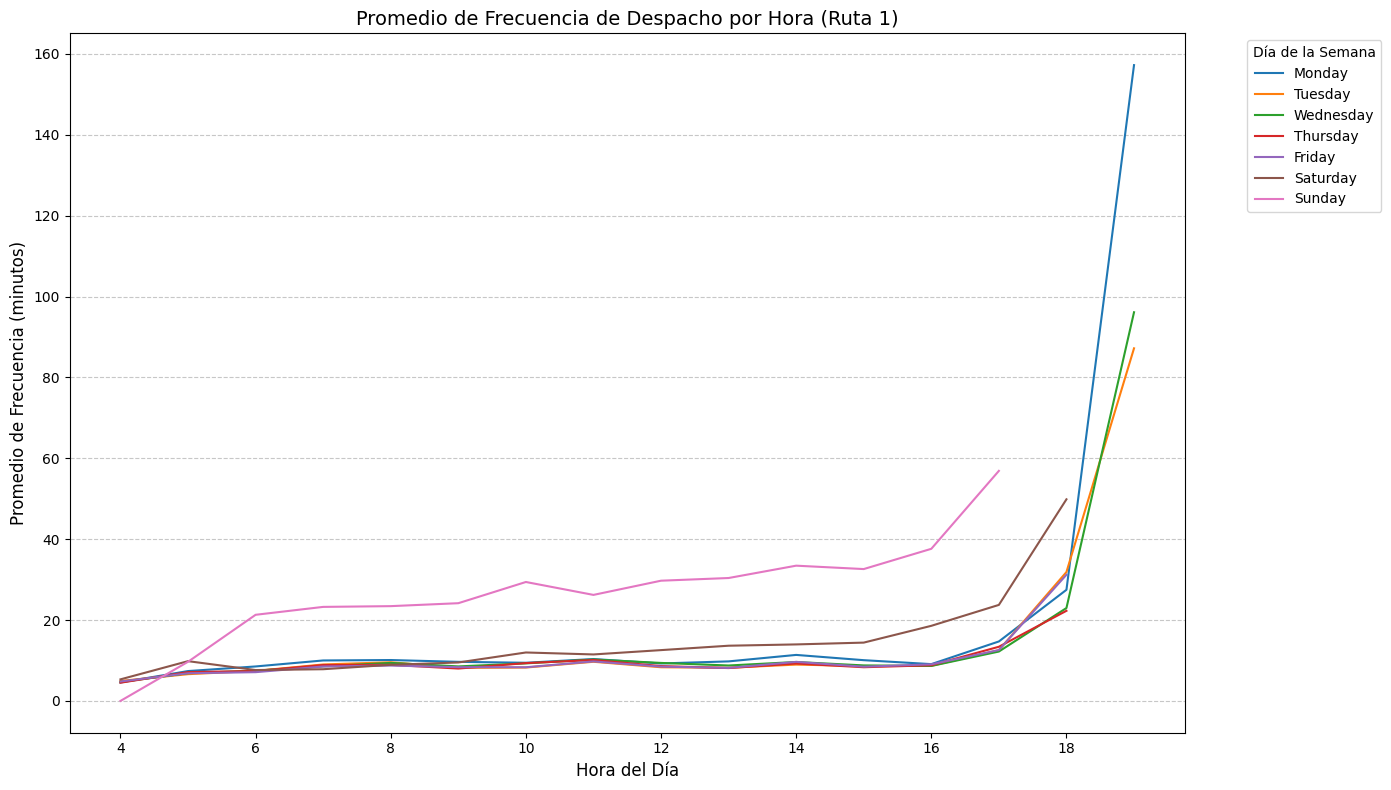

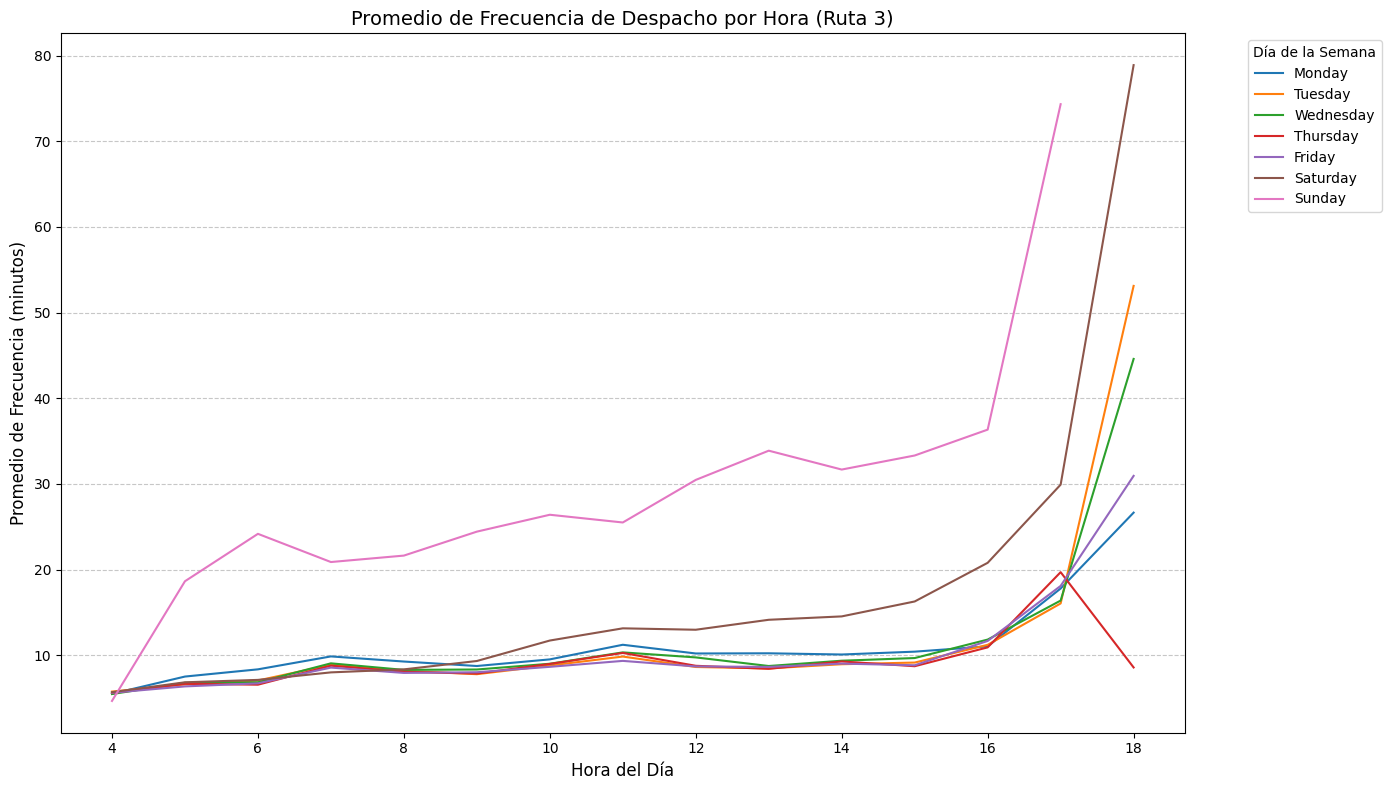

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de que la columna 'HORA_INICIAL_REAL' esté en formato datetime
df['HORA_INICIAL_REAL'] = pd.to_datetime(df['HORA_INICIAL_REAL'], errors='coerce')

# Crear una nueva columna para la hora (sin minutos ni segundos)
df['HORA'] = df['HORA_INICIAL_REAL'].dt.hour

# Calcular el promedio de la frecuencia de despacho por hora, día de la semana y ruta
promedio_frecuencia = (
    df.groupby(['DIA_SEMANA', 'FK_RUTA', 'HORA'])['F_DESPACHO']
    .mean()
    .reset_index(name='PROMEDIO_FRECUENCIA')
)

# Filtrar solo las rutas con FK_RUTA 1 y 3
rutas_filtradas = [1, 3]
promedio_frecuencia = promedio_frecuencia[promedio_frecuencia['FK_RUTA'].isin(rutas_filtradas)]

# Ordenar los días de la semana
dias_ordenados = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
promedio_frecuencia['DIA_SEMANA'] = pd.Categorical(promedio_frecuencia['DIA_SEMANA'], categories=dias_ordenados, ordered=True)

# Crear gráficos independientes por ruta
for ruta in rutas_filtradas:
    plt.figure(figsize=(14, 8))
    sns.lineplot(
        data=promedio_frecuencia[promedio_frecuencia['FK_RUTA'] == ruta],
        x='HORA',
        y='PROMEDIO_FRECUENCIA',
        hue='DIA_SEMANA',
        markers=True,
        dashes=False,
        palette='tab10'
    )
    
    # Configurar el gráfico
    plt.title(f'Promedio de Frecuencia de Despacho por Hora (Ruta {ruta})', fontsize=14)
    plt.xlabel('Hora del Día', fontsize=12)
    plt.ylabel('Promedio de Frecuencia (minutos)', fontsize=12)
    plt.legend(title='Día de la Semana', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    
    # Mostrar el gráfico
    plt.show()

In [15]:
import plotly.express as px

# Crear un DataFrame filtrado para las rutas 1 y 3
rutas_filtradas = [1, 3]
promedio_frecuencia = promedio_frecuencia[promedio_frecuencia['FK_RUTA'].isin(rutas_filtradas)]

# Crear un gráfico interactivo con Plotly
fig = px.line(
    promedio_frecuencia,
    x='HORA',
    y='PROMEDIO_FRECUENCIA',
    color='DIA_SEMANA',
    facet_col='FK_RUTA',  # Crear gráficos separados por ruta
    title='Promedio de Frecuencia de Despacho por Hora (Rutas 1 y 3)',
    labels={'HORA': 'Hora del Día', 'PROMEDIO_FRECUENCIA': 'Promedio de Frecuencia (minutos)', 'DIA_SEMANA': 'Día de la Semana'},
    markers=True
)

# Configurar el diseño
fig.update_layout(
    legend_title_text='Día de la Semana',
    xaxis=dict(tickmode='linear'),
    hovermode='x unified'
)

# Mostrar el gráfico interactivo
fig.show()

Observaciones técnicas clave
Frecuencias muy altas al final del día (17–19h): Explicado por el hecho de que los conductores se van a sus casas lo que baja la disponibilidad de vehiculos

Hasta 160 min en algunos días.

Se comprueba la desorganización, saturación o abandono de ruta.

Altísima variabilidad entre días:

Domingo y viernes tienen frecuencias muy distintas del resto.

Esto afecta la confiabilidad del servicio.

Estabilidad aceptable entre 5:00 y 13:00 aprox., pero no óptima:

Aunque hay consistencia, la frecuencia supera los 10–15 min en algunos tramos.

Ruta 3 parece más homogénea que Ruta 1, pero ambas tienen problemas después de las 16h.

In [ ]:
df.info()


## Calculo de KPI 'Mejora en los tiempos de despacho'

In [32]:
# Definir las rutas que deseas incluir
rutas_filtradas = [1, 3]

# Filtrar el DataFrame por las rutas deseadas
df_filtrado = df[df['FK_RUTA'].isin(rutas_filtradas)].copy()
df['MES'] = df['FECHA_INICIAL'].dt.to_period('M')  


In [33]:
df_promedios = df_filtrado.groupby(['MES', 'FK_RUTA', 'HORA'])['F_DESPACHO'].mean().reset_index()


In [34]:
# Ordenar por mes para asegurar el orden cronológico
df_promedios.sort_values(by=['FK_RUTA', 'HORA', 'MES'], inplace=True)

# Usar shift para obtener la frecuencia del mes anterior
df_promedios['F_ANTERIOR'] = df_promedios.groupby(['FK_RUTA', 'HORA'])['F_DESPACHO'].shift(1)

# Calcular mejora: positivo es mejora (menor tiempo entre despachos)
df_promedios['MEJORA_FRECUENCIA'] = df_promedios['F_ANTERIOR'] - df_promedios['F_DESPACHO']


In [ ]:
kpi_mensual = df_promedios.groupby(['MES', 'FK_RUTA'])['MEJORA_FRECUENCIA'].mean().reset_index()

kpi_mensual

In [40]:
import plotly.express as px
import plotly.graph_objects as go

# Asegurar que la columna MES esté en formato datetime
df_kpi = kpi_mensual.copy()
df_kpi['MES'] = pd.to_datetime(df_kpi['MES'].astype(str))

# Crear gráfico con líneas y marcadores por ruta
fig = px.line(
    df_kpi,
    x='MES',
    y='MEJORA_FRECUENCIA',
    color='FK_RUTA',
    markers=True,
    title='KPI: Mejora de Tiempo Promedio entre Despachos (por Mes y Ruta)',
    labels={
        'MES': 'Mes',
        'MEJORA_FRECUENCIA': 'Mejora de Frecuencia (minutos)',
        'FK_RUTA': 'Ruta'
    }
)

# Línea base horizontal en y=0 (sin mejora)
fig.add_hline(
    y=0,
    line_dash="dash",
    line_color="gray",
    annotation_text="Sin Mejora",
    annotation_position="top left"
)

# Estilo del gráfico
fig.update_layout(
    xaxis=dict(
        title="Mes",
        tickformat="%b %Y"
    ),
    yaxis_title="Mejora de Frecuencia (minutos)",
    hovermode="x unified",
    template="plotly_white",
    legend_title_text="Ruta"
)

fig.show()


Valores por encima de 0: indican que la frecuencia de despacho mejoró (se redujo el tiempo entre despachos).

Valores por debajo de 0: indican que la frecuencia empeoró respecto al mes anterior.

En junio 2024, la Ruta 3 presenta un gran empeoramiento de casi -5 minutos.

En julio 2024, hay una fuerte mejora para la Ruta 3, lo cual puede indicar algún cambio operativo positivo.

Para la Ruta 1, se observa una mejora sostenida entre mayo y julio, pero cierta inestabilidad posterior.

En febrero 2025, ambas rutas muestran mejora, especialmente la Ruta 3.

